## AISHWARYA PANDEY

## DATA SCIENCE AND BUSINESS ANALYTICS INTERN @ THE SPARKS FOUNDATION

## #GRIPJUNE21 #TSF

## TASK1 - Prediction using Supervised ML 

In [1]:
import pandas as pd

In [2]:
url = "Student.csv"

In [3]:
df = pd.read_csv(url)

In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
import numpy as np

In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
df.nunique()

Hours     23
Scores    23
dtype: int64

In [9]:
df['Hours'].value_counts()

2.7    2
2.5    2
5.1    1
3.3    1
6.9    1
3.2    1
6.1    1
7.4    1
7.8    1
8.3    1
4.5    1
7.7    1
1.1    1
3.8    1
3.5    1
8.9    1
1.9    1
5.9    1
4.8    1
8.5    1
5.5    1
9.2    1
1.5    1
Name: Hours, dtype: int64

In [10]:
df['Scores'].value_counts()

30    3
35    1
20    1
24    1
60    1
27    1
17    1
25    1
88    1
54    1
21    1
85    1
67    1
81    1
47    1
62    1
75    1
42    1
41    1
86    1
69    1
76    1
95    1
Name: Scores, dtype: int64

In [11]:
# Plotting Graph

Text(0, 0.5, 'Score')

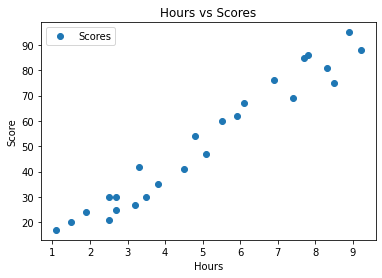

In [12]:
import matplotlib.pyplot as plt
df.plot(x='Hours',y='Scores',style= 'o')
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Score')

# Train-Test Splitting

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
train_set,test_set = train_test_split(df,test_size = 0.3 , random_state = 42)

In [15]:
print(f"Rows in train set:{len(train_set)}\n Rows in test set:{len(test_set)}\n")

Rows in train set:17
 Rows in test set:8



## Train_set

In [16]:
df = train_set.copy()

# Splitting Features and Labels

In [17]:
df = train_set.drop("Scores",axis=1)
df_labels = train_set["Scores"].copy()

In [18]:
df.head()

,Hours
22,3.8
5,1.5
2,3.2
12,4.5
15,8.9


In [19]:
df_labels.head()

22    35
5     20
2     27
12    41
15    95
Name: Scores, dtype: int64

# Selecting a Desired MODEl for Project

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [21]:
model.fit(df,df_labels)

LinearRegression()

# Check Predictions

In [22]:
y_pred = model.predict(df)

# Evaluating The Model

In [23]:
from sklearn.metrics import mean_squared_error

In [24]:
lin_mse = mean_squared_error(df_labels,y_pred)

In [25]:
lin_rmse = np.sqrt(lin_mse)

In [26]:
lin_rmse

5.603419312826166

## Compare Actual vs Predicted

In [27]:
df = pd.DataFrame({'Actual': df_labels ,'Predicted': y_pred})
print(df)

    Actual  Predicted
22      35  39.694252
5       20  17.360008
2       27  33.867928
12      41  46.491631
15      95  89.218011
3       75  85.333795
4       30  36.781090
20      30  29.012657
17      24  21.244224
21      54  49.404793
18      67  62.028496
24      86  78.536416
7       60  56.202172
10      85  77.565362
14      17  13.475792
19      69  74.652200
6       88  92.131173


## Saving the model

In [28]:
from joblib import dump,load
dump(model,'Student_Pred.joblib')

['Student_Pred.joblib']

## Testing the model on test data

In [30]:
X_test = test_set.drop("Scores",axis=1)
Y_test = test_set["Scores"].copy()

from sklearn.linear_model import LinearRegression
model1 = LinearRegression()

model1.fit(X_test,Y_test)

final_predictions = model1.predict(X_test)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions,list(Y_test))

[84.5 26.5 26.5 70.5 60.5 28.5 34.5 52.5] [81, 30, 21, 76, 62, 25, 42, 47]


In [31]:
final_rmse

4.8218253804964775

In [32]:
import numpy as np
from joblib import dump,load
model1 = load('Student_Pred.joblib')

In [33]:
features = np.array([9.25])
predicted_scores = model1.predict([features])
print("score=",predicted_scores)

score= [92.61670034]


predicted score if a student studies for 9.25 hrs/ day is 92.6